In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
df = pd.read_csv("../../../Data/min_COC_CC4_CR4_SLD_SLM_SLQ_SLY_COW_C_R_predictions.csv")

In [139]:
df.head()

,TimeTaken,Cases_created_within_past_8_hours,Cases_resolved_within_past_8_hours,Concurrent_open_cases,Created_On,Created_on_Weekend,ResolvedDate,Seconds_left_Day,Seconds_left_Month,Seconds_left_Qtr,Seconds_left_Year,TimeTaken_LinearRegression,TimeTaken_RandomForestRegressor
0,1131077.0,11,1,26,2017-03-12 19:49:25,1,2017-03-25 22:00:42,76235,1685435,1685435,9547835,957920.488166,1283985.66
1,447459.0,8,1,279,2017-03-12 21:30:11,1,2017-03-18 01:47:50,70189,1679389,1679389,9541789,637807.832275,375989.36
2,25474.0,6,1,315,2017-03-13 00:08:21,1,2017-03-13 07:12:55,60699,1669899,1669899,9532299,586933.856132,43697.50
3,777526.0,10,5,146,2017-03-13 02:49:57,1,2017-03-22 02:48:43,51003,1660203,1660203,9522603,788289.930486,743572.78
4,622610.0,12,7,247,2017-03-13 03:26:43,1,2017-03-20 08:23:33,48797,1657997,1657997,9520397,661759.343030,592204.26


In [113]:
print(len(df[df["TimeTaken_LinearRegression"]<0]))
print(len(df[df["TimeTaken_RandomForestRegressor"]<0]))

print(len(df[df["TimeTaken"]<0]))

0
0
0


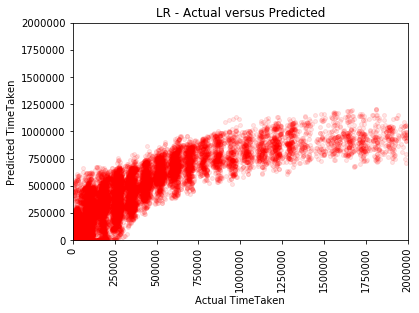

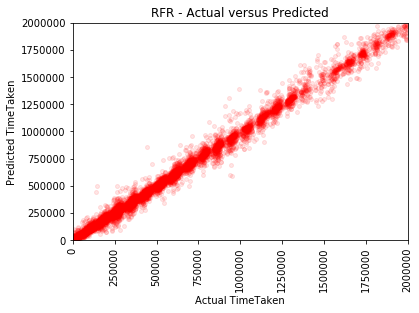

In [114]:
# plt.plot(df["TimeTaken"], df["Predicted_TimeTaken_LinearRegression"])
# plt.show()
# plt.plot(df["TimeTaken"], df["Predicted_TimeTaken_RandomForestRegressor"])
# plt.show()

def plot_predicted(x, y, alg, newpath=None, iter_no=None):
    plt.plot(x, y, 'ro', alpha=0.1, markersize=4)
    plt.xlabel("Actual TimeTaken")
    plt.ylabel("Predicted TimeTaken")
    plt.title(alg + " - Actual versus Predicted")
    plt.ylim(0, 2000000)
    plt.xlim(0, 2000000)
    plt.xticks(rotation="vertical")
    plt.show()
plot_predicted(df["TimeTaken"], df["TimeTaken_LinearRegression"], "LR")
plot_predicted(df["TimeTaken"], df["TimeTaken_RandomForestRegressor"], "RFR")

In [115]:
print(df["TimeTaken"].max())
print(df["TimeTaken"].mean() + 4*df["TimeTaken"].std())

1998392.0
1978774.6610460838


### plot RMSE to day, week, month, qtr, year

In [116]:
df.head()

,TimeTaken,Cases_created_within_past_8_hours,Cases_resolved_within_past_8_hours,Concurrent_open_cases,Created_On,Created_on_Weekend,ResolvedDate,Seconds_left_Day,Seconds_left_Month,Seconds_left_Qtr,Seconds_left_Year,Predicted_TimeTaken_LinearRegression,Predicted_TimeTaken_RandomForestRegressor
0,1131077.0,11,1,26,2017-03-12 19:49:25,1,2017-03-25 22:00:42,76235,1685435,1685435,9547835,957920.488166,1283985.66
1,447459.0,8,1,279,2017-03-12 21:30:11,1,2017-03-18 01:47:50,70189,1679389,1679389,9541789,637807.832275,375989.36
2,25474.0,6,1,315,2017-03-13 00:08:21,1,2017-03-13 07:12:55,60699,1669899,1669899,9532299,586933.856132,43697.50
3,777526.0,10,5,146,2017-03-13 02:49:57,1,2017-03-22 02:48:43,51003,1660203,1660203,9522603,788289.930486,743572.78
4,622610.0,12,7,247,2017-03-13 03:26:43,1,2017-03-20 08:23:33,48797,1657997,1657997,9520397,661759.343030,592204.26


In [195]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import seaborn as sns
from calendar import monthrange
import datetime
def day_in_quarter(date):
    # Function found on stack overflow
    # https://stackoverflow.com/questions/37471704/how-do-i-get-the-correspondent-day-of-the-quarter-from-a-date-field
    q2 = (datetime.datetime.strptime("4/1/{0:4d}".format(date.year), "%m/%d/%Y")).timetuple().tm_yday
    q3 = (datetime.datetime.strptime("7/1/{0:4d}".format(date.year), "%m/%d/%Y")).timetuple().tm_yday
    q4 = (datetime.datetime.strptime("10/1/{0:4d}".format(date.year), "%m/%d/%Y")).timetuple().tm_yday

    cur_day =  date.timetuple().tm_yday
    if (date.month < 4):
        return cur_day
    elif (date.month < 7):
        return cur_day - q2 + 1
    elif (date.month < 10):
        return cur_day - q3 + 1
    else:
        return cur_day - q4 + 1

In [226]:
def get_extra_cols(df, alg):
    df["Created_On"] = pd.to_datetime(df["Created_On"])
    df["ResolvedDate"] = pd.to_datetime(df["ResolvedDate"])
    df["TimeTaken_hours"] = df["TimeTaken"]/60/60
    df["TimeTaken_hours_%s"%alg] = df["TimeTaken_%s"%alg]/60/60
    
    df["Created_On_Day"] = df["Created_On"].apply(lambda x: int(x.strftime("%H")))  # Time of the day
    df["ResolvedDate_Day"] = df["ResolvedDate"].apply(lambda x: int(x.strftime("%H")))  # Time of the day
    df["Created_On_Week"] = df["Created_On"].apply(lambda x: int(x.strftime("%w")))  # Day of the week
    df["ResolvedDate_Week"] = df["ResolvedDate"].apply(lambda x: int(x.strftime("%w")))  # Day of the week
    df["Created_On_Month"] = df["Created_On"].apply(lambda x: int(x.strftime("%d")))  # Day of the month
    df["Created_On_Month"]-=1
    df["ResolvedDate_Month"] = df["ResolvedDate"].apply(lambda x: int(x.strftime("%d")))  # Day of the month
    df["ResolvedDate_Month"]-=1
    df["Created_On_Qtr"] = df["Created_On"].apply(lambda x: int(day_in_quarter(x)))  # Day of the Qtr
    df["ResolvedDate_Qtr"] = df["ResolvedDate"].apply(lambda x: int(day_in_quarter(x)))  # Day of the Qtr
    df["Created_On_Year"] = df["Created_On"].apply(lambda x: int(x.strftime("%j")))  # Day of the year
    df["ResolvedDate_Year"] = df["ResolvedDate"].apply(lambda x: int(x.strftime("%j")))  # Day of the year
    return df
get_extra_cols(df, "LinearRegression")

,TimeTaken,Cases_created_within_past_8_hours,Cases_resolved_within_past_8_hours,Concurrent_open_cases,Created_On,Created_on_Weekend,ResolvedDate,Seconds_left_Day,Seconds_left_Month,Seconds_left_Qtr,...,Created_On_Day,ResolvedDate_Day,Created_On_Week,ResolvedDate_Week,Created_On_Month,ResolvedDate_Month,Created_On_Qtr,ResolvedDate_Qtr,Created_On_Year,ResolvedDate_Year
0,1131077.0,11,1,26,2017-03-12 19:49:25,1,2017-03-25 22:00:42,76235,1685435,1685435,...,19,22,0,6,12,25,71,84,71,84
1,447459.0,8,1,279,2017-03-12 21:30:11,1,2017-03-18 01:47:50,70189,1679389,1679389,...,21,1,0,6,12,18,71,77,71,77
2,25474.0,6,1,315,2017-03-13 00:08:21,1,2017-03-13 07:12:55,60699,1669899,1669899,...,0,7,1,1,13,13,72,72,72,72
3,777526.0,10,5,146,2017-03-13 02:49:57,1,2017-03-22 02:48:43,51003,1660203,1660203,...,2,2,1,3,13,22,72,81,72,81
4,622610.0,12,7,247,2017-03-13 03:26:43,1,2017-03-20 08:23:33,48797,1657997,1657997,...,3,8,1,1,13,20,72,79,72,79
5,876710.0,14,9,70,2017-03-13 04:13:56,1,2017-03-23 07:45:46,45964,1655164,1655164,...,4,7,1,4,13,23,72,82,72,82
6,974057.0,15,9,48,2017-03-13 05:13:56,1,2017-03-24 11:48:13,42364,1651564,1651564,...,5,11,1,5,13,24,72,83,72,83
7,595918.0,19,9,250,2017-03-13 05:57:13,1,2017-03-20 03:29:11,39767,1648967,1648967,...,5,3,1,1,13,20,72,79,72,79
8,96713.0,31,12,335,2017-03-13 08:58:33,1,2017-03-14 11:50:26,28887,1638087,1638087,...,8,11,1,2,13,14,72,73,72,73
9,719060.0,35,12,208,2017-03-13 09:13:54,1,2017-03-21 16:58:14,27966,1637166,1637166,...,9,16,1,2,13,21,72,80,72,80


In [237]:
# df["Created_On_Month"]-=1
# df["Created_On_Month"][df["Created_On_Month"]==0]

1080     0
1081     0
1082     0
1083     0
1084     0
1085     0
1086     0
1087     0
1088     0
1089     0
2157     0
2158     0
2159     0
2160     0
2161     0
2162     0
2163     0
2164     0
2165     0
2166     0
2167     0
2168     0
2169     0
2170     0
2171     0
2172     0
2173     0
2174     0
2175     0
2176     0
        ..
18394    0
18395    0
18396    0
18397    0
18398    0
18399    0
18400    0
18401    0
18402    0
18403    0
18404    0
18405    0
18406    0
18407    0
18408    0
18409    0
18410    0
19453    0
19454    0
19455    0
19551    0
19552    0
19553    0
19633    0
19634    0
19635    0
19636    0
19696    0
19697    0
19698    0
Name: Created_On_Month, Length: 569, dtype: int64

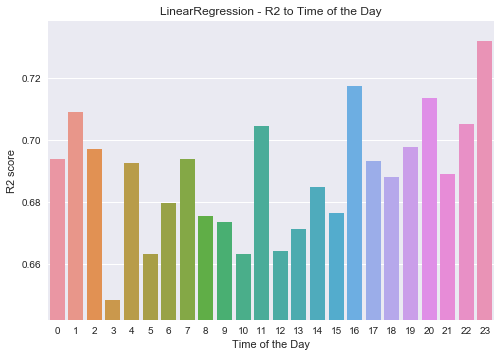

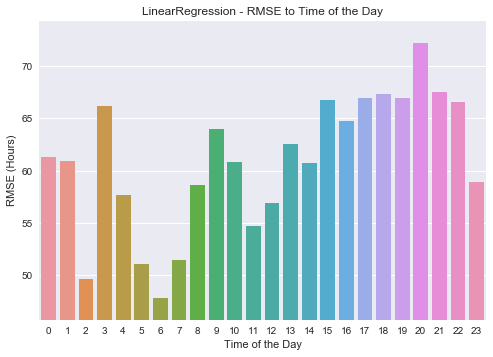

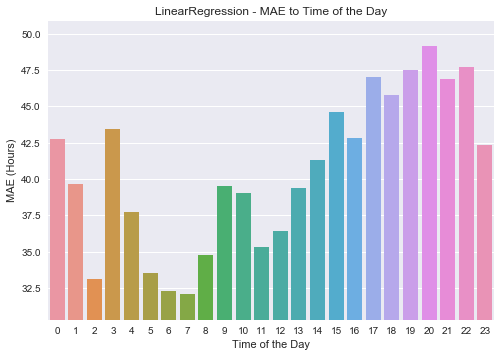

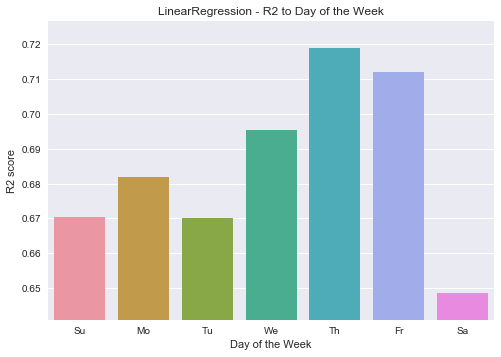

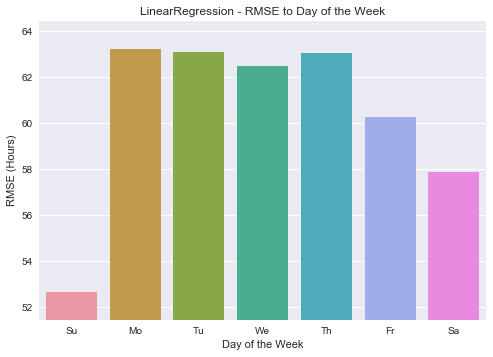

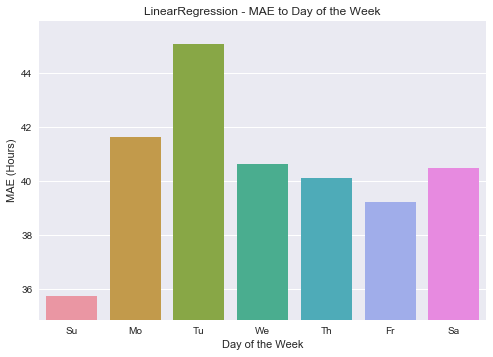

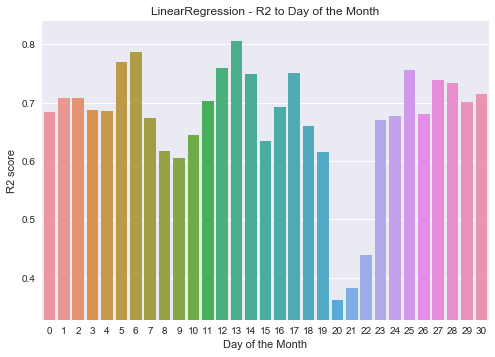

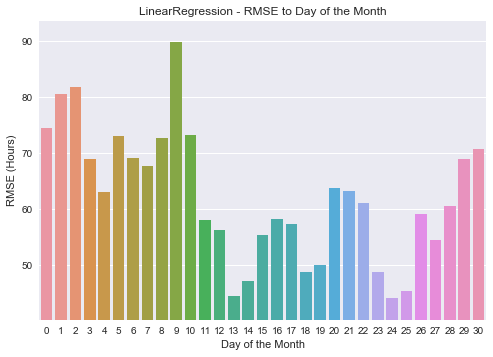

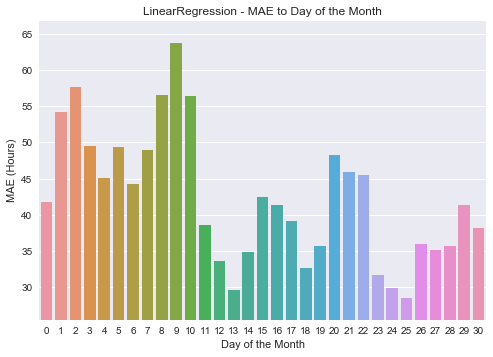

In [241]:
def get_errors(df, alg, time_range, col):
    r2_scores = []
    rmse_scores = []
    mae_scores = []
    for i in range(time_range):
        actual = df.loc[df[col] == i, "TimeTaken_hours"]
        predicted = df.loc[df[col] == i, "TimeTaken_hours_%s"%alg]
        r2_scores.append(r2_score(actual, predicted))
        rmse_scores.append(np.sqrt(mean_squared_error(actual, predicted)))
        mae_scores.append(mean_absolute_error(actual, predicted))
    return [r2_scores, rmse_scores, mae_scores]

def plot_errors(x, y, error_name, alg, y_label, x_label):
    x_num = [i for i in range(len(x))]

#     plt.plot(x_num, y)
#     plt.xticks(x_num, x)
#     plt.title("%s - %s for %s"% (alg, error_name, x_label))
#     plt.ylabel(y_label)
#     plt.xlabel(x_label)
#     plt.show()
    
    sns.barplot(x_num, y)
    plt.xticks(x_num, x)
    plt.title("%s - %s to %s"% (alg, error_name, x_label))
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.ylim(min(y)-np.std(y)/3, max(y)+np.std(y)/3)    
    plt.show()

def plot_errors_main(df, alg):
#     df["Created_On"] = pd.to_datetime(df["Created_On"])
#     df["ResolvedDate"] = pd.to_datetime(df["ResolvedDate"])
#     df["TimeTaken_hours"] = df["TimeTaken"]/60/60
#     df["TimeTaken_hours_%s"%alg] = df["TimeTaken_%s"%alg]/60/60
    
#     df["Created_On_Day"] = df["Created_On"].apply(lambda x: int(x.strftime("%H")))  # Time of the day
#     df["ResolvedDate_Day"] = df["ResolvedDate"].apply(lambda x: int(x.strftime("%H")))  # Time of the day
#     df["Created_On_Week"] = df["Created_On"].apply(lambda x: int(x.strftime("%w")))  # Day of the week
#     df["ResolvedDate_Week"] = df["ResolvedDate"].apply(lambda x: int(x.strftime("%w")))  # Day of the week
#     df["Created_On_Month"] = df["Created_On"].apply(lambda x: int(x.strftime("%d")))  # Day of the month
#     df["ResolvedDate_Month"] = df["ResolvedDate"].apply(lambda x: int(x.strftime("%d")))  # Day of the month
#     df["Created_On_Qtr"] = df["Created_On"].apply(lambda x: int(day_in_quarter(x)))  # Day of the Qtr
#     df["ResolvedDate_Qtr"] = df["ResolvedDate"].apply(lambda x: int(day_in_quarter(x)))  # Day of the Qtr
#     df["Created_On_Year"] = df["Created_On"].apply(lambda x: int(x.strftime("%j")))  # Day of the year
#     df["ResolvedDate_Year"] = df["ResolvedDate"].apply(lambda x: int(x.strftime("%j")))  # Day of the year
    #     df = get_extra_cols(df, alg)
    
    error_names = ["R2", "RMSE", "MAE"]
    y_labels = ["R2 score", "RMSE (Hours)", "MAE (Hours)"]
    
    scores = get_errors(df, alg, 24, "Created_On_Day")
    x_vals = [x for x in range(24)]
    x_label = "Time of the Day"
    for score, error_name, y_label in zip(scores, error_names, y_labels):
#         plot_errors(x, y, error_name, alg, y_label, x_label)
        plot_errors(x_vals, score, error_name, alg, y_label, x_label)
    
    scores = get_errors(df, alg, 7, "Created_On_Week")
    x_vals = ["Su", "Mo", "Tu", "We", "Th", "Fr", "Sa"]
    x_label = "Day of the Week"
    for score, error_name, y_label in zip(scores, error_names, y_labels):
        plot_errors(x_vals, score, error_name, alg, y_label, x_label)
        
    scores = get_errors(df, alg, 31, "Created_On_Month")
    x_vals = [x for x in range(31)]
    x_label = "Day of the Month"
    for score, error_name, y_label in zip(scores, error_names, y_labels):
        plot_errors(x_vals, score, error_name, alg, y_label, x_label)    
plot_errors_main(df, "LinearRegression")